In [26]:
# Melakukan import modul drive dari google.colab
from google.colab import drive

# Mount Google Drive ke direktori /content/drive
drive.mount('/content/drive')

# Import library pandas dengan alias 'pd'
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Mendefinisikan path/file lokasi dataset CSV
file_path = '/content/heart.csv'
# Menggunakan pandas untuk membaca dataset CSV ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari dataframe
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
# Mengganti nama kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' menjadi 'Annual income' dan 'Spending score'
df = df.rename(columns={'age': 'umur', 'chol': 'kolestrol' , 'trestbps': 'tekanandarah' })

# Menampilkan lima baris pertama dari dataframe setelah mengganti nama kolom
df.head()


,umur,sex,tekanandarah,kolestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,145,174,0,1,125,1,2.6,0,0,3,4
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,1


In [36]:
# Menghapus kolom 'CustomerID' dan 'Gender' dari dataframe
df = df.drop(['sex', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','label'], axis=1)

# Menampilkan lima baris pertama dari dataframe setelah menghapus kolom
print(df.head())


   umur  tekanandarah  kolestrol
0    52           125        212
1    53           140        203
2    70           145        174
3    61           148        203
4    62           138        294


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

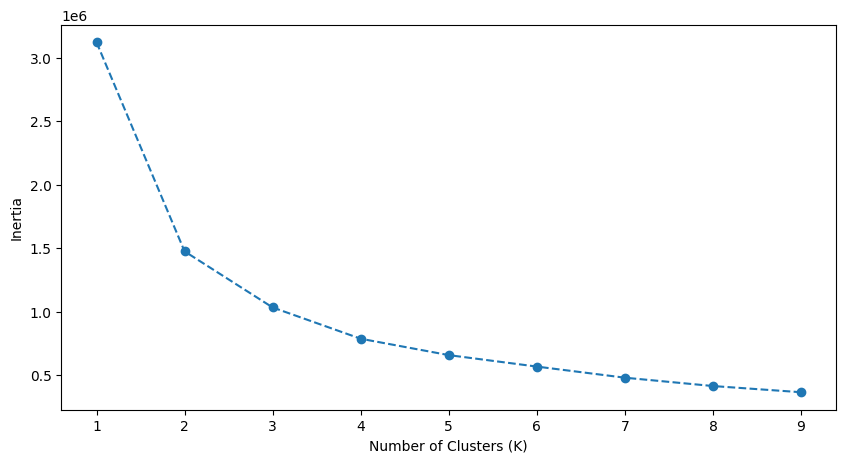

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih kolom 'Age', 'Annual income', dan 'Spending score' sebagai fitur untuk clustering
X = df[['umur', 'tekanandarah', 'kolestrol']]

# Menentukan jumlah maksimum cluster yang akan diuji
max_k = 10

# Inisialisasi list untuk menyimpan nilai inertia
inertia_values = []

# Melakukan perulangan untuk menguji jumlah cluster dari 1 hingga max_k-1
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Membuat plot dengan jumlah cluster (K) pada sumbu x dan inertia pada sumbu y
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


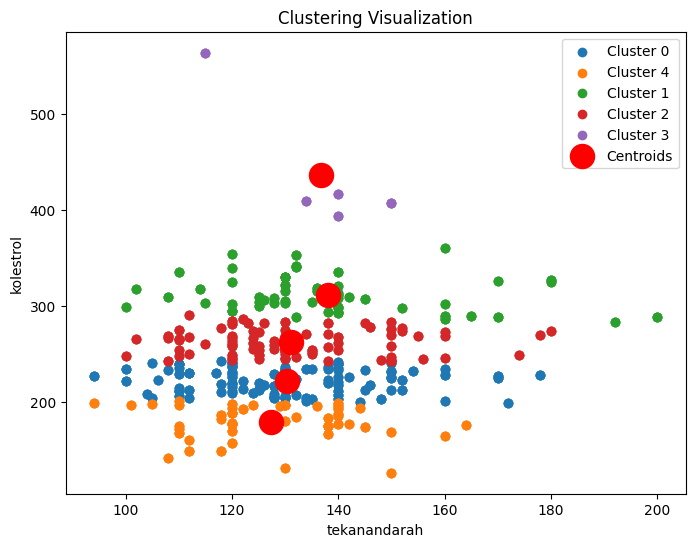

In [40]:
n_clusters = 5  # Jumlah cluster yang ingin Anda bentuk
kmeans = KMeans(n_clusters, random_state=0)

# Menyimpan hasil prediksi cluster pada dataframe 'df' dengan kolom baru 'label'
df['label'] = kmeans.fit_predict(X)

# Membuat plot untuk visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['tekanandarah'], df[df['label'] == label]['kolestrol'], label=f'Cluster {label}')

# Menampilkan titik-titik centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')

# Memberi label sumbu x dan y serta judul plot
plt.xlabel('tekanandarah')
plt.ylabel('kolestrol')
plt.title('Clustering Visualization')

# Menampilkan legenda untuk cluster dan centroid
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import silhouette_score

# Membuat dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores[k] = silhouette_avg

# Mencetak hasil Silhouette Score untuk setiap jumlah cluster yang diuji
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.4662008392019376
Silhouette Score for k=3: 0.3782265391139034
Silhouette Score for k=4: 0.37835953112012294
Silhouette Score for k=5: 0.31892009680397415
Silhouette Score for k=6: 0.3346422797695217
Silhouette Score for k=7: 0.33967925770577273
Silhouette Score for k=8: 0.3470936507592406
Silhouette Score for k=9: 0.32914974864345287
Silhouette Score for k=10: 0.322673506804925


In [43]:
from sklearn.metrics import davies_bouldin_score

# Membuat dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores[k] = dbi

# Mencetak hasil Davies-Bouldin Index untuk setiap jumlah cluster yang diuji
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.7783614164226822
Davies-Bouldin Index for k=3: 0.8645812091688384
Davies-Bouldin Index for k=4: 0.8115956112753681
Davies-Bouldin Index for k=5: 0.9199302731446449
Davies-Bouldin Index for k=6: 0.9530984851085015
Davies-Bouldin Index for k=7: 0.9498099043533329
Davies-Bouldin Index for k=8: 0.8214334839479069
Davies-Bouldin Index for k=9: 0.8222530314789049
Davies-Bouldin Index for k=10: 0.854918563886138


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Membuat dictionary untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    chi = calinski_harabasz_score(X, labels)
    chi_scores[k] = chi

# Mencetak hasil Calinski-Harabasz Index untuk setiap jumlah cluster yang diuji
for k, chi in chi_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {chi}")
